In [132]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import seaborn as sns
import gzip
import scrublet as scr
import matplotlib.pyplot as plt
from anndata.io import read_csv, read_excel, read_hdf, read_loom, read_mtx, read_text
import os

sns.set_theme(style="ticks", context="notebook")


In [133]:

#import sys
#sys.path.append('../../3_preprocessing/')
from preprocessing_functions import *

 # Specify inputs and outputs (directories) 

In [134]:
os.listdir('./')

['preprocessing_functions.py',
 'thymus',
 '.DS_Store',
 'spleen',
 'bone_marrow_output',
 'Desktop',
 '__pycache__',
 'Scrublet.ipynb',
 '.ipynb_checkpoints',
 '.pybiomart.sqlite',
 'bone_marrow']

In [197]:
pp_name = 'bone_marrow_output2'

In [198]:

#### Declare directories
# organism = 'mus_musculus'

#gene_repo = 'Desktop/alignment_data/bone_marrow/10X_P7_3'
soupx_corrected_counts_dir = '/Users/amandheer/Desktop/alignment_data'
# in thids dir, there are more directories for each tissue

h5ad_export_dir = '/Users/amandheer/Desktop/alignment_data' # export directory
tissue_h5ad_export_dir = os.path.join(h5ad_export_dir, pp_name)
#create export directory if not existing
if not os.path.exists(tissue_h5ad_export_dir):
    os.makedirs(tissue_h5ad_export_dir)
        

# path to original metadata, 
ori_metadata_dir = 'Desktop/alignment_data/bone_marrow/10X_P7_3/soupx_export/obs_metadata.csv'

# just a label
counts_based_on = 'merged_standard_gene_output'


# list driectories under soupx_corrected_counts_dir, which are the tissues
tissues = listdir(soupx_corrected_counts_dir)
tissues.sort()


In [199]:
tissues

['.ipynb_checkpoints',
 '.pybiomart.sqlite',
 'Scrublet.ipynb',
 '__pycache__',
 'bone_marrow',
 'bone_marrow_output',
 'bone_marrow_output2',
 'plots',
 'preprocessing_functions.py',
 'spleen',
 'thymus']

In [200]:
# you will not have this
# tissue = 'Abdominal_wall'
# metadate_file = os.path.join(ori_metadata_dir, tissue + '.txt.gz')


In [201]:
export_plots_directory = os.path.join(tissue_h5ad_export_dir, 'bone_marrow_plots')
if not os.path.exists(export_plots_directory):
    os.makedirs(export_plots_directory)

In [202]:
os.path.join(export_plots_directory)

'/Users/amandheer/Desktop/alignment_data/bone_marrow_output2/bone_marrow_plots'

# E.g. load data

In [203]:

# Path to directory containing matrix.mtx.gz, features.tsv.gz, barcodes.tsv.gz
data_dir = os.path.expanduser('~/Desktop/alignment_data/bone_marrow/10X_P7_3/soupx_export/counts')

# Check if the directory exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Directory not found: {data_dir}")

# Read 10X data
adata2 = sc.read_10x_mtx(
    path=data_dir,
    var_names='gene_ids',  # Use 'gene_symbols' if your data contains gene symbols instead
    make_unique=False,     # Set to True if duplicate names exist
    cache=False            # Cache the data locally if desired
)

# Print AnnData object summary
print(adata2)

AnnData object with n_obs × n_vars = 3934 × 57010
    var: 'gene_symbols', 'feature_types'


In [204]:
soupx_corrected_counts_dir = os.path.expanduser('~/Desktop/alignment_data')  # Base directory
tissue = "bone_marrow"  # Specify the tissue folder
sample = "10X_P7_3"     # Specify the sample folder

# Path to the obs_metadata.csv file
metadata_path = os.path.join(soupx_corrected_counts_dir, tissue, sample, 'soupx_export', 'obs_metadata.csv')

# Check if the metadata file exists
if not os.path.exists(metadata_path):
    raise FileNotFoundError(f"Metadata file not found: {metadata_path}")

# Read the metadata CSV and add 'pct_unspliced' to adata.obs
adata2.obs['pct_unspliced'] = pd.read_csv(metadata_path, index_col=0)['pct_unspliced']

In [205]:
soupx_corrected_counts_dir = os.path.expanduser('~/Desktop/alignment_data')  # Modify if needed
tissue = "bone_marrow"  # Specify your tissue
sample = "10X_P7_3"     # Specify your sample

# Path to the 10x data (counts directory)
sample_path = os.path.join(soupx_corrected_counts_dir, tissue, sample, 'soupx_export', 'counts')

# Load the 10x matrix data
adata1 = sc.read_10x_mtx(
    path=sample_path,
    var_names='gene_ids',  # Specifies gene IDs in var_names
    make_unique=False,
    cache=False
)
adata2.var['gene_ids'] = adata.var_names

# Path to the obs_metadata.csv file
metadata_path = os.path.join(soupx_corrected_counts_dir, tissue, sample, 'soupx_export', 'obs_metadata.csv')
adata2.obs['pct_unspliced'] = pd.read_csv(metadata_path, index_col=0)['pct_unspliced']


In [223]:
adata_merged.obs

,doublet_score,predicted_doublet,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,total_counts_pl,log1p_total_counts_pl,pct_counts_pl
AAACCTGAGAGGGCTT-0,0.009819,False,0,1453,7.282074,3432.0,8.141190,16.462704,33.0,3.526361,0.961538,909.0,6.813445,26.486015,5.0,1.791759,0.145688,0.0,0.000000,0.000000
AAACCTGAGCATCATC-0,0.084862,False,0,4518,8.416046,16038.0,9.682778,8.074573,158.0,5.068904,0.985160,2267.0,7.726654,14.135179,3.0,1.386294,0.018706,5.0,1.791759,0.031176
AAACCTGAGCTCAACT-0,0.033499,False,0,677,6.519147,2050.0,7.626083,53.512195,16.0,2.833213,0.780488,63.0,4.158883,3.073171,1.0,0.693147,0.048780,1.0,0.693147,0.048780
AAACCTGCACCATCCT-0,0.014456,False,0,1451,7.280697,3399.0,8.131531,17.063842,26.0,3.295837,0.764931,880.0,6.781058,25.889969,2.0,1.098612,0.058841,0.0,0.000000,0.000000
AAACCTGCAGAGTGTG-0,0.025120,False,0,2319,7.749322,6073.0,8.711773,14.869093,55.0,4.025352,0.905648,1035.0,6.943122,17.042646,5.0,1.791759,0.082332,1.0,0.693147,0.016466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTACTTGAC-1,0.028409,False,1,930,6.836259,3347.0,8.116118,56.109949,4.0,1.609438,0.119510,83.0,4.430817,2.479833,7.0,2.079442,0.209143,0.0,0.000000,0.000000
TTTGTCAGTCGCGGTT-1,0.003790,False,1,168,5.129899,9622.0,9.171911,97.879859,0.0,0.000000,0.000000,11.0,2.484907,0.114321,9207.0,9.127828,95.686966,0.0,0.000000,0.000000
TTTGTCATCCGCATAA-1,0.043165,False,1,2463,7.809541,11537.0,9.353401,47.204646,13.0,2.639057,0.112681,784.0,6.665684,6.795528,4626.0,8.439664,40.097080,1.0,0.693147,0.008668
TTTGTCATCGTACGGC-1,0.008336,False,1,964,6.872128,2525.0,7.834392,35.564356,4.0,1.609438,0.158416,146.0,4.990433,5.782178,7.0,2.079442,0.277228,1.0,0.693147,0.039604


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.29
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 32.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.5%
Elapsed time: 3.2 seconds


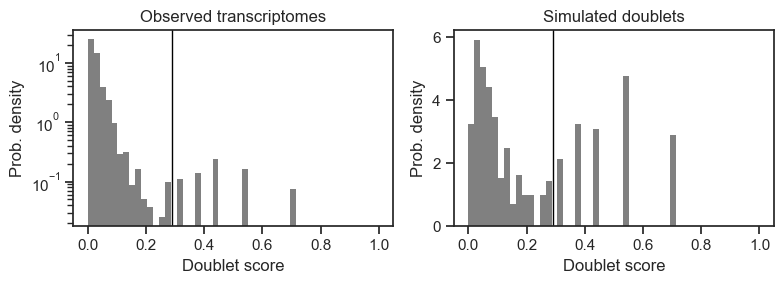

In [207]:

# Set expected doublet rate based on method expected doublet rate based on cells recovered / or based on literature
# https://kb.10xgenomics.com/hc/en-us/articles/360001378811-What-is-the-maximum-number-of-cells-that-can-be-profiled
adata2 = call_scrublet(adata1, expected_doublet_rate = 0.05, plot_umap=False)

Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 45.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.9%


AnnData object with n_obs × n_vars = 3934 × 57010
    obs: 'doublet_score', 'predicted_doublet'
    var: 'gene_symbols', 'feature_types'
    uns: 'scrublet'

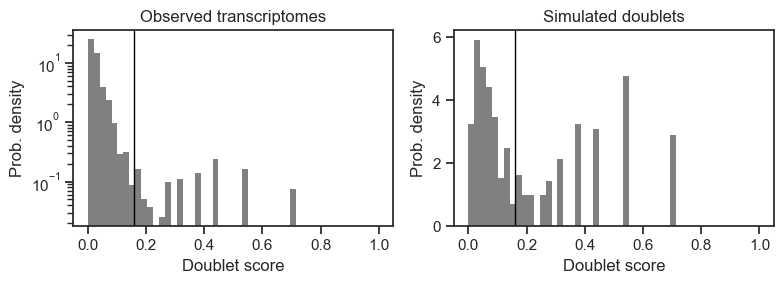

In [208]:
# one way to set threshold is to set the line between both functions
set_doublet_threshold(adata2, doublet_threshold = 0.16, plot_umap=False)


# or you can remove the cells with 5% highest doublet score

after calculating doublet rate, merge together the matrices of the matching tissues.


In [252]:
adata.var

/Users/amandheer/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [241]:
adata2.obs["ori_barcode"] = adata2.obs.index


In [243]:
adata2.obs

,doublet_score,predicted_doublet,ori_barcode,barcode
AAACCTGAGAGGGCTT,0.009819,False,AAACCTGAGAGGGCTT,10X_P7_2_AAACCTGAGAGGGCTT
AAACCTGAGCATCATC,0.084862,False,AAACCTGAGCATCATC,10X_P7_2_AAACCTGAGCATCATC
AAACCTGAGCTCAACT,0.033499,False,AAACCTGAGCTCAACT,10X_P7_2_AAACCTGAGCTCAACT
AAACCTGCACCATCCT,0.014456,False,AAACCTGCACCATCCT,10X_P7_2_AAACCTGCACCATCCT
AAACCTGCAGAGTGTG,0.025120,False,AAACCTGCAGAGTGTG,10X_P7_2_AAACCTGCAGAGTGTG
...,...,...,...,...
TTTGTCAGTACTTGAC,0.028409,False,TTTGTCAGTACTTGAC,10X_P7_2_TTTGTCAGTACTTGAC
TTTGTCAGTCGCGGTT,0.003790,False,TTTGTCAGTCGCGGTT,10X_P7_2_TTTGTCAGTCGCGGTT
TTTGTCATCCGCATAA,0.043165,False,TTTGTCATCCGCATAA,10X_P7_2_TTTGTCATCCGCATAA
TTTGTCATCGTACGGC,0.008336,False,TTTGTCATCGTACGGC,10X_P7_2_TTTGTCATCGTACGGC


In [244]:
sample_name = '10X_P7_3' 
adata2.obs["ori_barcode"] = adata1.obs.index

adata2.obs["barcode"] = sample_name + "_" + adata1.obs.index

In [245]:
adata2.obs

,doublet_score,predicted_doublet,ori_barcode,barcode
AAACCTGAGAGGGCTT,0.009819,False,AAACCTGAGAGGGCTT,10X_P7_3_AAACCTGAGAGGGCTT
AAACCTGAGCATCATC,0.084862,False,AAACCTGAGCATCATC,10X_P7_3_AAACCTGAGCATCATC
AAACCTGAGCTCAACT,0.033499,False,AAACCTGAGCTCAACT,10X_P7_3_AAACCTGAGCTCAACT
AAACCTGCACCATCCT,0.014456,False,AAACCTGCACCATCCT,10X_P7_3_AAACCTGCACCATCCT
AAACCTGCAGAGTGTG,0.025120,False,AAACCTGCAGAGTGTG,10X_P7_3_AAACCTGCAGAGTGTG
...,...,...,...,...
TTTGTCAGTACTTGAC,0.028409,False,TTTGTCAGTACTTGAC,10X_P7_3_TTTGTCAGTACTTGAC
TTTGTCAGTCGCGGTT,0.003790,False,TTTGTCAGTCGCGGTT,10X_P7_3_TTTGTCAGTCGCGGTT
TTTGTCATCCGCATAA,0.043165,False,TTTGTCATCCGCATAA,10X_P7_3_TTTGTCATCCGCATAA
TTTGTCATCGTACGGC,0.008336,False,TTTGTCATCGTACGGC,10X_P7_3_TTTGTCATCGTACGGC


In [246]:
#integrate here both samples
adata_merged = adata1.concatenate(adata2, batch_key='sample')

/var/folders/8p/xlqh16zs5s12cjly36xp9prr0000gn/T/ipykernel_76730/3730959346.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merged = adata1.concatenate(adata2, batch_key='sample')


In [247]:
print(adata_merged.obs.columns)

Index(['doublet_score', 'predicted_doublet', 'ori_barcode', 'barcode',
       'sample'],
      dtype='object')


In [248]:
organism = 'mmusculus'
adata_merged.var['gene_ids'] = adata_merged.var_names

# Label orthologs
adata_merged = label_hs_orthologs(adata_merged, organism=organism,
                                  server='http://feb2023.archive.ensembl.org/',
                                  mart='ENSEMBL_MART_ENSEMBL')

# Get Ensembl gene labels
adata_merged = get_ensemble_labels(adata_merged, organism=organism + '_gene_ensembl',
                                    server='http://feb2023.archive.ensembl.org/',
                                    mart='ENSEMBL_MART_ENSEMBL',
                                    extended_labeling=True,
                                    include_cell_cycle=False)

# Calculate QC metrics for adata_merged
sc.pp.calculate_qc_metrics(adata_merged, qc_vars=["mt", "ribo", "hb", "pl"],
                           inplace=True, percent_top=[20], log1p=True)

In [249]:
# look at # Filter for low gene count, low unspliced pct, doublet part, and the following parts

filter_unspliced = True
mad_limit_for_unspliced = 5

filter_high_mito = True
limit_mito =10


filter_doublets = True
percentile_limit_doublets = 95

filter_low_counts = True
min_UMIs = 500


# Import data

- I settle tissue, each tissue has many samples. 
- loading sequentially all samples

In [84]:
#### DO NOT RUN 
metadate_file = 'path_to_metadata_file'  # Set this to your actual file path

# Print loading message
print(f"Loading metadata file: (/-_·)/ {metadate_file}")

# Open the gzipped metadata file and read it into a pandas DataFrame
with gzip.open(metadate_file, mode="rt") as f:
    ori_metadata = pd.read_csv(f, sep='\t')  # Assuming tab-separated values

# Process metadata
ori_metadata['ori_barcode'] = [i.split(sep="_")[0] for i in ori_metadata.index]

# List the available samples in the soupx_corrected_counts_dir
soupx_corrected_counts_dir = 'Desktop/alignment_data/'  # Ensure this is correct
tissue = 'bone_marrow'  # Modify this as needed
samples = os.listdir(os.path.join(soupx_corrected_counts_dir, tissue))

# Extract unique samples from the metadata
samples_in_meta = ori_metadata['Batch'].unique()

# Find intersection between available samples and metadata samples
intersection = set(samples) & set(samples_in_meta)

# Check if all samples match
if len(intersection) == len(samples):
    print('Sample match with metadata specifications! ヽ(⌐■_■)ノ♪♬')
else:
    raise ValueError("(O_.) Metadata not available for all samples")

Loading metadata file: (/-_·)/ path_to_metadata_file


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_metadata_file'

In [25]:
### DO NOT RUN
# Load in data
adatas = {}

for sample in samples:
    adata = sc.read_10x_mtx(path = os.path.join(soupx_corrected_counts_dir, tissue, sample,'counts'), 
                          var_names= 'gene_ids', make_unique=False, cache=False)
    adata.var['gene_ids'] = adata.var_names
    adata.obs['pct_unspliced'] = pd.read_csv(os.path.join(soupx_corrected_counts_dir, tissue, sample, 'obs_metadata.csv'), index_col = 0)['pct_unspliced']
    #adata = call_scrublet(adata)
    adatas[sample] = adata.copy()


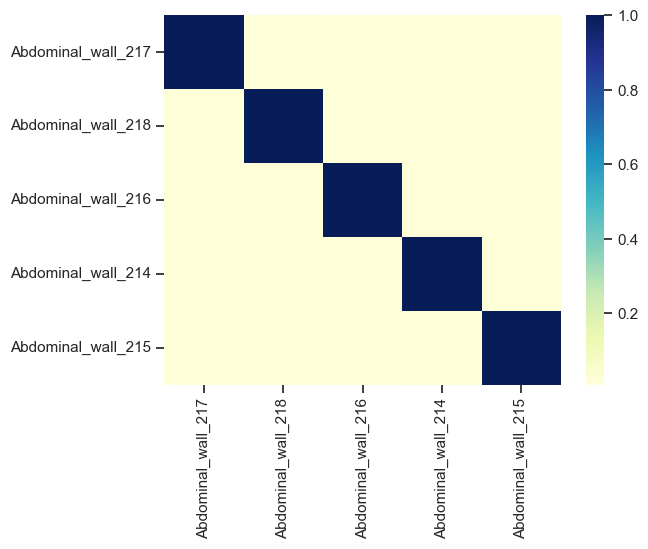

In [26]:
### DO NOT RUN 
df = pd.DataFrame(index = samples)


for sample_x in samples:
    sample_list_sc = []
    overlap_list = []
    for sample_y in samples:
        x_in_y = sum(adatas[sample_x].obs_names.isin(adatas[sample_y].obs_names))
        total_x = len(adatas[sample_x].obs_names)
        overlap_pct = x_in_y/total_x
        overlap_list.append(overlap_pct)
        sample_list_sc.append(sample_y)
    df[sample_x] = overlap_list

sns.heatmap(df, cmap="YlGnBu", annot=False)
plt.show()
    
    
    

In [87]:
id_to_genename_dict = adatas[sample].var['gene_symbols'].to_dict()

NameError: name 'adatas' is not defined

In [88]:
with save_plots_to_pdf(os.path.join(export_plots_directory, 'scrublet_plots.pdf')):
    for sample in samples:
        adatas[sample] = set_doublet_threshold(adatas[sample], doublet_threshold = 0.20, plot_title = sample)

NameError: name 'samples' is not defined

In [89]:
# here is the code to merge samples together.


adata_list = []

for sample, adata in adatas.items():
    #adata = get_ensemble_labels(adata, organism=organism + '_gene_ensembl',
    #                                        server='http://feb2023.archive.ensembl.org/',
    #                                        mart='ENSEMBL_MART_ENSEMBL',
    #                                        extended_labeling=True,
    #                                        include_cell_cycle=False)

    # Calculate QC metrics
    #sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb", "pl"],
    #                       inplace=True, percent_top=[20], log1p=True)

    # Merge with cell_type original annotations
    adata.obs["ori_barcode"]=[i.split(sep="-")[0] for i in adata.obs_names]
    adata.obs['sample'] = sample

    # this is for the reference cell metadata, optional
    tmp_labels = ori_metadata[ori_metadata.Batch == sample].set_index('ori_barcode')
    tmp_labels = tmp_labels.add_prefix('ref_')
    adata.obs = pd.merge(adata.obs,tmp_labels, left_index=True, right_index=True, how='left')

    
    #Basic labelling
    adata.obs['macaque_id'] = adata.obs['ref_Sample'].value_counts().index.unique()[0]

    adata.obs['tissue'] = tissue
    adata.obs['sample'] = sample
    adata.obs['ori_barcode'] = adata.obs.index
    adata.obs.index = adata.obs['sample'] + ':' + adata.obs['ori_barcode']
    

    adata.obs = adata.obs.drop(columns = ['ref_seurat_clusters','ref_Sample', 'ref_Tissue', 'ref_percent.mt', 'ref_Batch', 'ref_nFeature_RNA', 
                             'ref_nCount_RNA', 'ref_orig.ident'])

    adata_list.append(adata)

    

NameError: name 'adatas' is not defined

In [13]:
adata = sc.concat(adata_list, axis = 0)
adata.var['gene_symbols'] = adata.var.index.map(id_to_genename_dict)
adata.var['gene_ids'] = adata.var.index


In [99]:
organism

'mmusculus'

In [100]:
adata = label_hs_orthologs(adata, organism=organism,
                           server='http://feb2023.archive.ensembl.org/',
                           mart='ENSEMBL_MART_ENSEMBL')

adata = get_ensemble_labels(adata, organism=organism + '_gene_ensembl',
                                        server='http://feb2023.archive.ensembl.org/',
                                        mart='ENSEMBL_MART_ENSEMBL',
                                        extended_labeling=True,
                                        include_cell_cycle=False)

# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb", "pl"],
                       inplace=True, percent_top=[20], log1p=True)

In [98]:
adata.var

,gene_symbols,feature_types,gene_ids,hsapiens_orthologs_id,hsapiens_orthologs_name,mt,ribo,tf,hb,pl,...,pcg,exc,cyt,mem,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSMUSG00000104478,Gm38212,Gene Expression,ENSMUSG00000104478,nan,nan,False,False,False,False,False,...,False,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
ENSMUSG00000104385,Gm7449,Gene Expression,ENSMUSG00000104385,nan,nan,False,False,False,False,False,...,False,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
ENSMUSG00000086053,Gm15178,Gene Expression,ENSMUSG00000086053,nan,nan,False,False,False,False,False,...,False,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
ENSMUSG00000101231,Gm28283,Gene Expression,ENSMUSG00000101231,nan,nan,False,False,False,False,False,...,False,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
ENSMUSG00000102135,Gm37108,Gene Expression,ENSMUSG00000102135,nan,nan,False,False,False,False,False,...,False,False,False,False,24,0.006489,0.006468,99.401048,26.0,3.295837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00002074970,ENSMUSG00002074970,Gene Expression,ENSMUSG00002074970,nan,nan,False,False,False,False,False,...,False,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
ENSMUSG00002075729,ENSMUSG00002075729,Gene Expression,ENSMUSG00002075729,nan,nan,False,False,False,False,False,...,False,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
ENSMUSG00002074899,ENSMUSG00002074899,Gene Expression,ENSMUSG00002074899,nan,nan,False,False,False,False,False,...,False,False,False,False,15,0.003743,0.003736,99.625655,15.0,2.772589
ENSMUSG00002076890,ENSMUSG00002076890,Gene Expression,ENSMUSG00002076890,nan,nan,False,False,False,False,False,...,False,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000


# Filter for low gene count, low unspliced pct, doublet

In [218]:
filter_unspliced = True # only relevant for single nuclei
mad_limit_for_unspliced = 5

filter_high_mito = True # general mitochondrial filtering
limit_mito =10


filter_doublets = True
percentile_limit_doublets = 95 

filter_low_counts = True
min_UMIs = 500


In [250]:
print(adata_merged.obs.columns)
print(adata_merged.var.columns)

Index(['doublet_score', 'predicted_doublet', 'ori_barcode', 'barcode',
       'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt',
       'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo',
       'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb',
       'total_counts_pl', 'log1p_total_counts_pl', 'pct_counts_pl'],
      dtype='object')
Index(['gene_symbols', 'feature_types', 'gene_ids', 'hsapiens_orthologs_id',
       'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA',
       'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts'],
      dtype='object')


In [251]:
adata.obs["ref_Celltype"] = adata.obs["cell_ontology_class"]

KeyError: 'cell_ontology_class'

In [220]:
with save_plots_to_pdf(os.path.join(export_plots_directory, 'bone_marrow_merged.pdf')):
    # General overview plots
    sc.pl.scatter(adata_merged, "total_counts", "n_genes_by_counts", color="ref_Celltype")
    sc.pl.violin(adata_merged, keys=['pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'pct_counts_pl'], multi_panel=True)
    sc.pl.scatter(adata_merged, x="pct_counts_in_top_20_genes", y="pct_counts_mt", color="ref_Celltype")
    sc.pl.scatter(adata_merged, x="n_genes_by_counts", y="pct_counts_mt", color="ref_Celltype")
    sc.pl.scatter(adata_merged, x="n_genes_by_counts", y="pct_counts_in_top_20_genes", color="ref_Celltype")
    sc.pl.scatter(adata_merged, x="pct_counts_in_top_20_genes", y="pct_unspliced", color="ref_Celltype")
    sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_unspliced", color="ref_Celltype")

    if filter_unspliced:
        median = np.median(adata_merged.obs['pct_unspliced'])
        mad = median_abs_deviation(adata_merged.obs['pct_unspliced'])
        limit_unspliced = median - mad_limit_for_unspliced * mad

        sns.histplot(adata_merged.obs['pct_unspliced'], edgecolor=None, color='#F0A500')
        sns.despine()
        plt.axvline(x=limit_unspliced, color='#E45826', linestyle='--', linewidth=2)
        plt.axvline(x=median, color='black', linestyle='--', linewidth=2)
        plt.suptitle(f'{tissue} - proportion of unspliced counts in cells.', weight='bold')
        plt.title(f'{mad_limit_for_unspliced} x median absolute deviation: {round(limit_unspliced, 2)}, Median: {round(median, 2)}')
        plt.show()

        adata_merged.obs['splice_outlier'] = adata_merged.obs['pct_unspliced'] < limit_unspliced

    if filter_high_mito:
        sns.violinplot(adata_merged.obs['pct_counts_mt'], color='#E6D5B8')
        sns.despine()
        plt.axhline(y=limit_mito, linestyle='--', linewidth=2, color='black')
        plt.suptitle(f'{tissue} - proportion of mito gene counts in cells.', weight='bold')
        plt.title(f'Upper limit for mito content: {limit_mito}')
        plt.show()

        adata_merged.obs['mito_outlier'] = adata_merged.obs['pct_counts_mt'] > limit_mito

    if filter_doublets:
        doublet_score_95th_percentile = np.percentile(adata_merged.obs['doublet_score'], percentile_limit_doublets)
        sns.histplot(adata_merged.obs['doublet_score'], edgecolor=None, color='#F0A500')
        sns.despine()
        plt.axvline(x=doublet_score_95th_percentile, color='#E45826', linestyle='--', linewidth=2)
        plt.suptitle(f'{tissue} - proportion of doublets scores in cells.', weight='bold')
        plt.title(f'95th percentile at: {doublet_score_95th_percentile}')
        plt.show()

        adata_merged.obs['assigned_doublet'] = adata_merged.obs['doublet_score'] > doublet_score_95th_percentile

    # Filtering by count
    if filter_low_counts:
        ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_counts_in_top_20_genes", color='mito_outlier',
                           show=False, title=f'Min detected UMIs: {min_UMIs}, colored by mito_outlier')
        ax.axvline(x=np.log1p(min_UMIs), color='#E45826', linestyle='--', linewidth=2)
        plt.suptitle(f'{tissue} - UMIs detected per cell', weight='bold')
        plt.show()

        ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_counts_in_top_20_genes", color='splice_outlier',
                           show=False, title=f'Min detected UMIs: {min_UMIs}, colored by splice_outlier')
        ax.axvline(x=np.log1p(min_UMIs), color='#E45826', linestyle='--', linewidth=2)
        plt.suptitle(f'{tissue} - UMIs detected per cell', weight='bold')
        plt.show()

        sns.histplot(adata_merged.obs['log1p_total_counts'], edgecolor=None, color='#F0A500')
        plt.axvline(x=np.log1p(min_UMIs), color='#E45826', linestyle='--', linewidth=2)
        plt.suptitle(f'{tissue} - UMIs detected per cell', weight='bold')
        plt.title(f'Min UMIs detection: {min_UMIs}')
        plt.show()

        adata_merged.obs['low_counts_outlier'] = adata_merged.obs['total_counts'] < min_UMIs

        ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="log1p_n_genes_by_counts", color='low_counts_outlier', show=False)
        plt.suptitle(f'{tissue} - UMIs detected per cell', weight='bold')
        plt.title(f'Min UMIs detection: {min_UMIs}')
        plt.show()

        ax = sc.pl.scatter(adata_merged, x="total_counts", y="n_genes_by_counts", color='low_counts_outlier', show=False)
        plt.suptitle(f'{tissue} - UMIs detected per cell', weight='bold')
        plt.title(f'Min UMIs detection: {min_UMIs}')
        plt.show()

    # Mark all outliers
    adata_merged.obs['outlier'] = (adata_merged.obs['splice_outlier']) | (adata_merged.obs['assigned_doublet']) | (adata_merged.obs['mito_outlier']) | (adata_merged.obs['low_counts_outlier'])

    ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_counts_in_top_20_genes", color='outlier', 
                       show=False)
    plt.suptitle(f'{tissue} - Outliers excluded', weight='bold')
    plt.show()

    sc.pl.scatter(adata_merged, x="pct_counts_in_top_20_genes", y="pct_unspliced", color="outlier", show=False)
    plt.suptitle(f'{tissue} - Outliers excluded', weight='bold')
    plt.show()

    ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_counts_in_top_20_genes", color='outlier', 
                       show=False)
    plt.suptitle(f'{tissue} - Outliers excluded', weight='bold')
    plt.show()

    ax = sc.pl.scatter(adata_merged, x="pct_counts_mt", y="pct_unspliced", color='outlier', 
                       show=False)
    plt.suptitle(f'{tissue} - Outliers excluded', weight='bold')
    plt.show()


/var/folders/8p/xlqh16zs5s12cjly36xp9prr0000gn/T/ipykernel_76730/1229408159.py:19: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed in 3.10.
  self.pdf.close()


ValueError: `x`, `y`, and potential `color` inputs must all come from either `.obs` or `.var`

In [23]:
adata_save_before_filter = adata.copy()

# Second line of filtering

In [234]:
adata = adata_save_before_filter.copy()

In [235]:
adata = adata[~adata.obs['outlier']].copy()

In [236]:
adata.obs = adata.obs.drop(columns = ['splice_outlier', 'mito_outlier', 'assigned_doublet', 'low_counts_outlier', 'outlier'])

In [237]:
filter_mito_again = True
max_perentile_limit_mito = 90 #renage between 90 and 95, , or lower if data is really dirty

total_counts_maximum_percentile = 99.5 # or 99.9
gene_counts_maximum_percentile = 99.5 # or 99.9

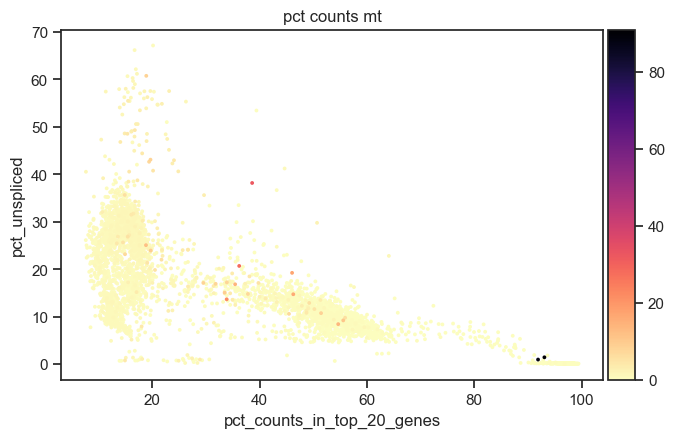

NameError: name 'filter_mito_again' is not defined

In [92]:
with save_plots_to_pdf(os.path.join(export_plots_directory, 'second_filter_plots.pdf')):
    sc.pl.scatter(adata, x="pct_counts_in_top_20_genes", y="pct_unspliced",  color = 'pct_counts_mt', color_map = 'magma_r',
                                   show = False)
    plt.show()

    if filter_mito_again:

        limit_mito = np.percentile(adata.obs['pct_counts_mt'], max_perentile_limit_mito)
        sns.violinplot(adata.obs['pct_counts_mt'], edgecolor = '#1B1A17',  color = '#E6D5B8')
        sns.despine()
        plt.axhline(y=limit_mito, color='#E45826', linestyle='--', linewidth=2)
        plt.suptitle(f'{tissue} - proportion of mito counts in cells.', weight = 'bold')
        plt.title(f'Max {round(limit_mito,2)}% mito_counts in cell, corresponds to keeping {round(max_perentile_limit_mito)}% of droplets after first filtering')
        plt.show()



        adata.obs['mito_outlier'] = adata.obs['pct_counts_mt'] > limit_mito


        sc.pl.scatter(adata, x="pct_counts_in_top_20_genes", y="pct_unspliced",  color = 'mito_outlier', color_map = 'magma_r')




    total_counts_99th_percentile = np.percentile(adata.obs['total_counts'], total_counts_maximum_percentile)
    gene_counts_99th_percentile = np.percentile(adata.obs['n_genes_by_counts'], gene_counts_maximum_percentile)


    ax = sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts",  color = 'ref_Celltype',
                       title = f'Max UMI limit: {round(total_counts_99th_percentile,2)}; Max Gene limit: {round(gene_counts_99th_percentile,2)}',
                                   show = False)
    plt.suptitle(f'{tissue} - Drop {round(100-total_counts_maximum_percentile,3)}% of cells with highest counts', weight = 'bold')
    plt.axvline(x=total_counts_99th_percentile, color='#E45826',linestyle='--', linewidth=2)
    plt.axhline(y=gene_counts_99th_percentile, color='#E45826',linestyle='--', linewidth=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    ax = sc.pl.scatter(adata, x="log1p_total_counts", y="log1p_n_genes_by_counts",   color = 'ref_Celltype',
                                          title = f'Max UMI limit: {round(total_counts_99th_percentile,2)}; Max Gene limit: {round(gene_counts_99th_percentile,2)}',
                                   show = False)
    plt.suptitle(f'{tissue} - Drop {round(100-total_counts_maximum_percentile,3)}% of cells with highest counts', weight = 'bold')
    plt.axvline(x=np.log1p(total_counts_99th_percentile), color='#E45826', linestyle='--', linewidth=2)
    plt.axhline(y=np.log1p(gene_counts_99th_percentile), color='#E45826', linestyle='--', linewidth=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


    sns.histplot(adata.obs['total_counts'], edgecolor = None, color = '#F0A500')
    plt.axvline(x=total_counts_99th_percentile, color='#E45826', linestyle='--', linewidth=2)
    plt.suptitle(f'{tissue} - Drop {round(100-total_counts_maximum_percentile,3)}% of cells with highest counts', weight = 'bold')
    plt.title(f'Cells dropped with a total UMI count over: {round(total_counts_99th_percentile, 2)}')
    plt.show()



    sns.histplot(adata.obs['n_genes_by_counts'], edgecolor = None, color = '#F0A500')
    plt.axvline(x=gene_counts_99th_percentile,color='#E45826', linestyle='--', linewidth=2)
    plt.suptitle(f'{tissue} - Drop {round(100-gene_counts_maximum_percentile,3)}% of cells with highest counts', weight = 'bold')
    plt.title(f'Cells dropped with a total gene count over: {round(gene_counts_99th_percentile, 2)}')
    plt.show()
    
    adata.obs['high_count_outlier'] = (adata.obs['total_counts'] > total_counts_99th_percentile) | (adata.obs['n_genes_by_counts'] > gene_counts_99th_percentile)
    
    
    
    

    adata.obs['outlier'] = (adata.obs['mito_outlier']) |(adata.obs['high_count_outlier'])


    ax = sc.pl.scatter(adata, x="log1p_total_counts", y="pct_counts_in_top_20_genes",  color='outlier', color_map = 'viridis',
                               show = False)
    plt.suptitle(f'{tissue} - Outliers excluded', weight = 'bold')
    plt.show()


    sc.pl.scatter(adata, x="pct_counts_in_top_20_genes", y="pct_unspliced", color="outlier",color_map = 'viridis',
                  show = False)
    plt.suptitle(f'{tissue} - Outliers excluded', weight = 'bold')
    plt.show()

    ax = sc.pl.scatter(adata, x="log1p_total_counts", y="pct_counts_in_top_20_genes",  color='outlier', color_map = 'viridis',
                               show = False)
    plt.suptitle(f'{tissue} - Outliers excluded', weight = 'bold')
    plt.show()
    
    ax = sc.pl.scatter(adata, x="pct_counts_mt", y="pct_unspliced",  color='outlier', color_map = 'viridis',
                               show = False)
    plt.suptitle(f'{tissue} - Outliers excluded', weight = 'bold')
    plt.show()



In [239]:
adata = adata[~adata.obs['outlier']].copy()

In [240]:
adata.obs = adata.obs.drop(columns = ['outlier', 'high_count_outlier', 'mito_outlier'])



In [241]:
# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb", "pl", "exc", "cyt", "mem"],
                       inplace=True, percent_top=[20], log1p=False)

In [242]:

# save as h5ad file 
#adata.write_h5ad(os.path.join(export_plots_directory, tissue + '_all_genes.h5ad'))

# Clustering

In [8]:
os.path.join(export_plots_directory, tissue + '_all_genes.h5ad')

'/Users/emilioskarwan/Documents/data/macque/macaque_sc/processed_by_tissue/pp_out_merged_velocyto/Abdominal_wall/Abdominal_wall_all_genes.h5ad'

In [24]:
adata = read_h5ad(os.path.join(export_plots_directory, tissue + '_all_genes.h5ad'))

In [25]:
print(f"Minimum pct_unspliced: {min(adata.obs['pct_unspliced'])}")

print(f"Maximum pct_counts_mt: {max(adata.obs['pct_counts_mt'])}")

print(f"Maximum total_counts: {max(adata.obs['total_counts'])}")
print(f"Minimum total_counts: {min(adata.obs['total_counts'])}")

print(f"Maximum n_genes_by_counts: {max(adata.obs['n_genes_by_counts'])}")
print(f"Minimum n_genes_by_counts: {min(adata.obs['n_genes_by_counts'])}")




Minimum pct_unspliced: 51.268115942029
Maximum pct_counts_mt: 1.6393442153930664
Maximum total_counts: 6230.0
Minimum total_counts: 500.0
Maximum n_genes_by_counts: 2068
Minimum n_genes_by_counts: 239


In [26]:
sc.pp.filter_genes(adata, min_cells = 3)
#genes_to_exclude = ['ENSMFAG00000062016', 'ENSMFAG00000062016','ENSMFAG00000064104' ]
#genes_excluded = adata.var[adata.var.index.isin(genes_to_exclude)]


#adata = adata[:,~adata.var.index.isin(genes_to_exclude)].copy()

In [27]:
adata


AnnData object with n_obs × n_vars = 25933 × 24150
    obs: 'pct_unspliced', 'doublet_score', 'predicted_doublet', 'ori_barcode', 'sample', 'ref_Celltype', 'ref_Abbreviation', 'macaque_id', 'tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl', 'log1p_total_counts_pl', 'pct_counts_pl', 'total_counts_exc', 'pct_counts_exc', 'total_counts_cyt', 'pct_counts_cyt', 'total_counts_mem', 'pct_counts_mem'
    var: 'gene_symbols', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'ref_Ce

In [28]:
adata.layers['soupx_counts'] = adata.X.copy()

/Users/emilioskarwan/anaconda3/envs/3-10/lib/python3.10/site-packages/scanpy/preprocessing/_scale.py:299: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


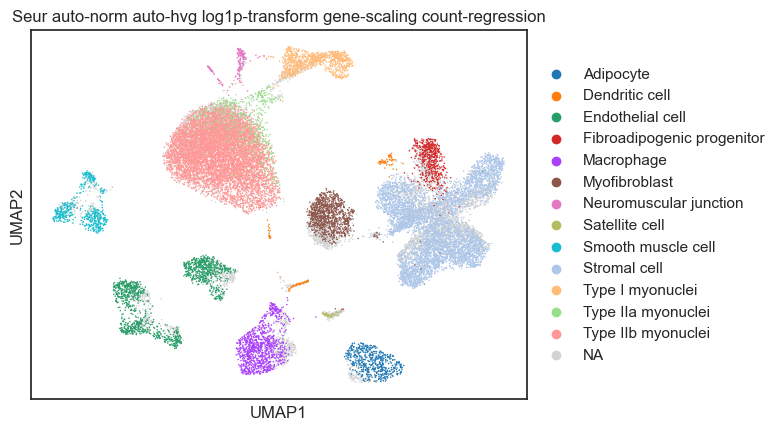

In [29]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]
#sc.pp.scale(adata, max_value=10) # optional
#sc.pp.regress_out(adata, ['total_counts']) # optional , regress total_counts, regress pct_mt_counts
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata, method = 'umap')
sc.pl.umap(adata, color = 'ref_Celltype',title = 'Seur auto-norm auto-hvg log1p-transform gene-scaling count-regression' )


In [309]:
sc.pp.normalize_total(adata)

#adata.var['norm_variance'] = np.var(adata.X.todense(), axis = 0).T
#adata.var['norm_mean'] = np.mean(adata.X.todense(), axis = 0).T
#adata.var['norm_median'] = np.median(adata.X.todense(), axis = 0).T
#adata.var['norm_std'] = np.sqrt(adata.var['norm_variance']).T

#sc.pp.log1p(adata)



#
#adata.var['log1p_norm_variance'] = np.var(adata.X.todense(), axis = 0).T
#adata.var['log1p_norm_mean'] = np.mean(adata.X.todense(), axis = 0).T
#adata.var['log1p_norm_median'] = np.median(adata.X.todense(), axis = 0).T
#adata.var['log1p_norm_std'] = np.sqrt(adata.var['log1p_norm_variance']).T

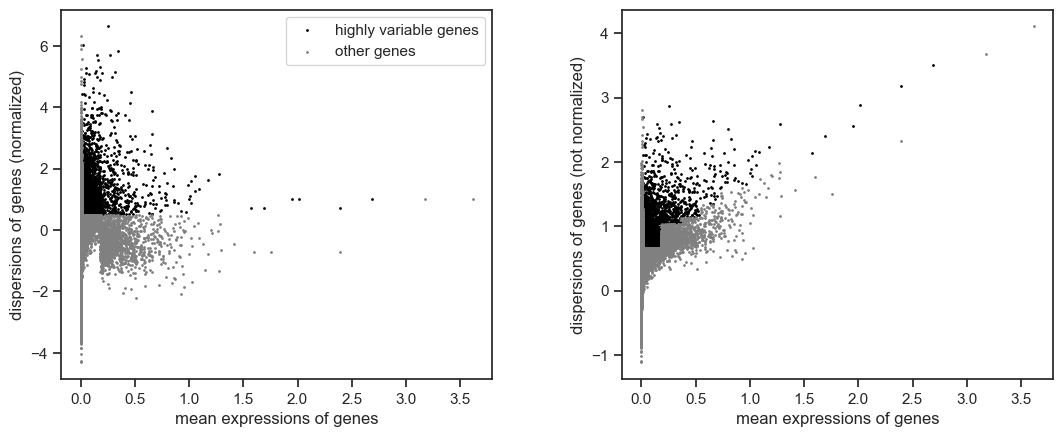

In [285]:
sc.pp.highly_variable_genes(adata)

sc.pl.highly_variable_genes(adata)

In [310]:
adata.layers['sqrt_transformed'] = np.sqrt(adata.X)

In [286]:
#adata.layers['scaled_0'] = np.asarray(sc.pp._scale.scale_array(adata.X))
adata.layers['scaled_1'] = np.asarray(sc.pp._scale.scale_array(adata.X.T).T)


In [311]:

sc.pp.pca(adata,layer = 'sqrt_transformed' )
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [313]:
sc.tl.leiden(adata)

/var/folders/db/2ty9r5lx1p757d4_h8qhbm_w0000gp/T/ipykernel_34947/3467744858.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


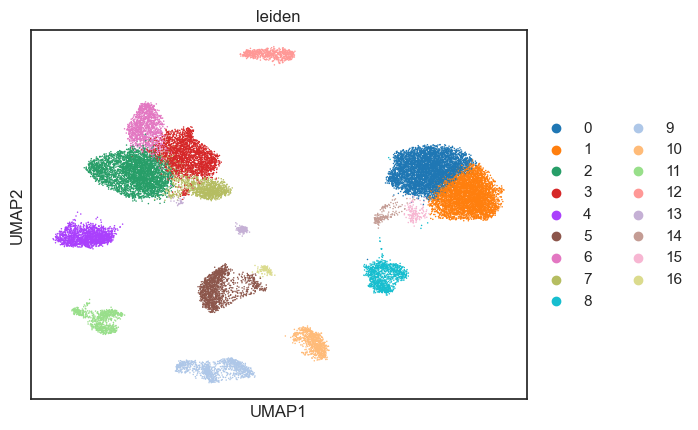

In [314]:
sc.pl.umap(adata, color = 'leiden')


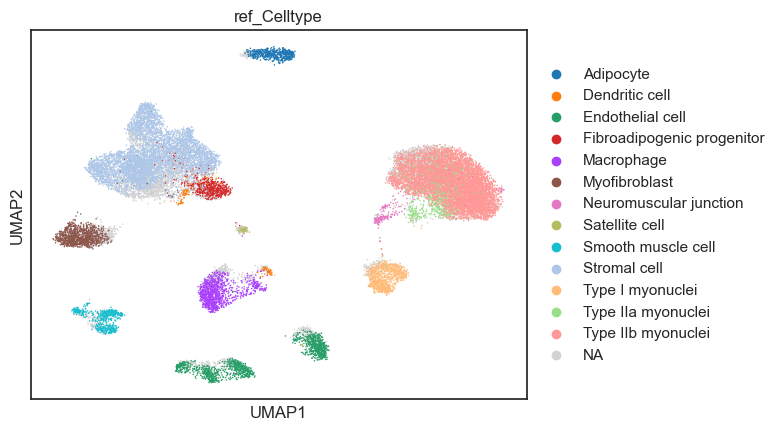

In [312]:
sc.pl.umap(adata, color = 'ref_Celltype')
## THis is normal scaled

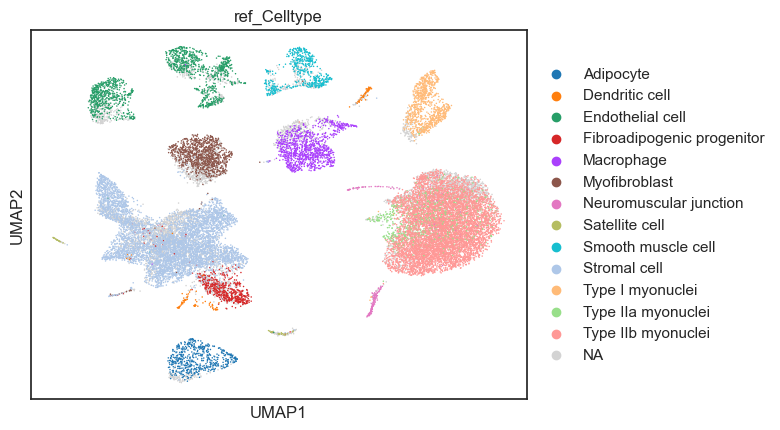

In [295]:
sc.pl.umap(adata, color = 'ref_Celltype')
## THis is pearson residuals normalisation

In [289]:
adata

AnnData object with n_obs × n_vars = 25933 × 24148
    obs: 'pct_unspliced', 'doublet_score', 'predicted_doublet', 'ori_barcode', 'sample', 'ref_Celltype', 'ref_Abbreviation', 'macaque_id', 'tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl', 'log1p_total_counts_pl', 'pct_counts_pl', 'total_counts_exc', 'pct_counts_exc', 'total_counts_cyt', 'pct_counts_cyt', 'total_counts_mem', 'pct_counts_mem'
    var: 'gene_symbols', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variabl

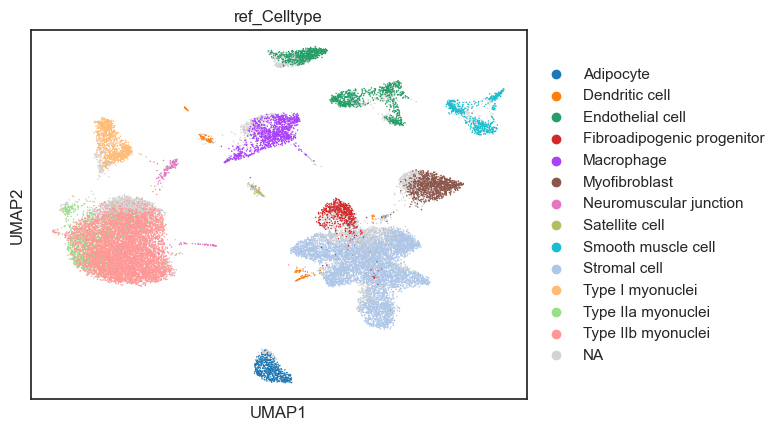

In [260]:
sc.pl.umap(adata, color = 'ref_Celltype')
## THis is normal scaled

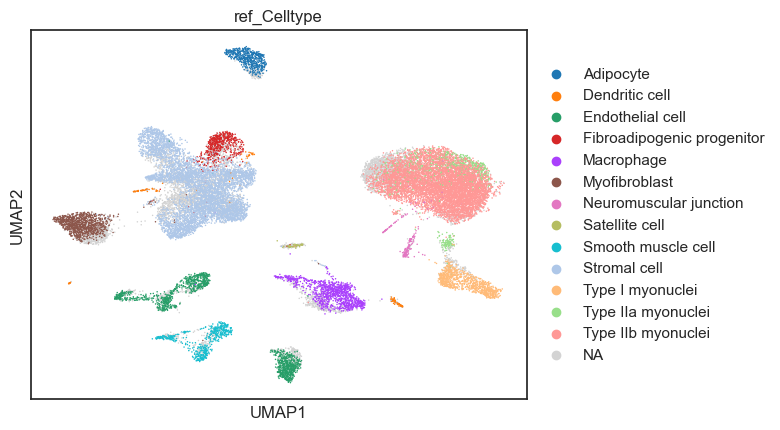

In [232]:
sc.pl.umap(adata, color = 'ref_Celltype')

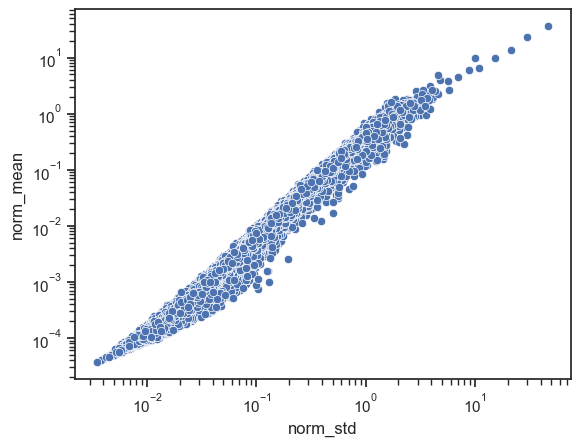

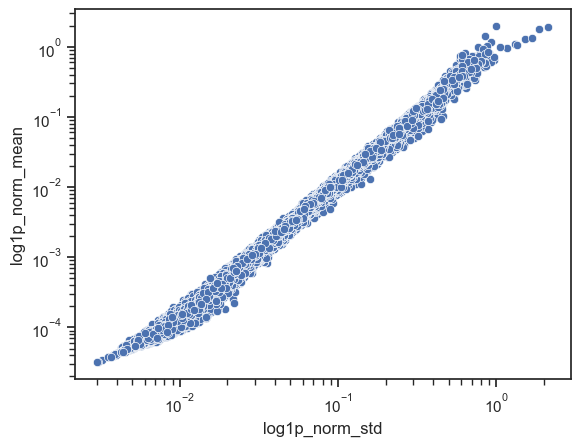

In [185]:
sns.scatterplot(adata.var, x = 'norm_std', y = 'norm_mean')
plt.xscale('log')
plt.yscale('log')
plt.show()
sns.scatterplot(adata.var, x = 'log1p_norm_std', y = 'log1p_norm_mean')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [186]:
adata

AnnData object with n_obs × n_vars = 25933 × 24148
    obs: 'pct_unspliced', 'doublet_score', 'predicted_doublet', 'ori_barcode', 'sample', 'ref_Celltype', 'ref_Abbreviation', 'macaque_id', 'tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl', 'log1p_total_counts_pl', 'pct_counts_pl'
    var: 'gene_symbols', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'norm_variance', 'norm_mean', 'norm_median', 'norm_std', 'log1p_norm_variance', 'log1p_norm_mean', 'log1p_norm_median', 'log1p_no

In [187]:
genes_to_remove = ['ENSMFAG00000062016', 'ENSMFAG00000062016','ENSMFAG00000064104' ]

In [188]:
adata.var.sort_values('norm_std', ascending = False )[0:20][['gene_symbols', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts']]



,gene_symbols,gene_ids,hsapiens_orthologs_id,hsapiens_orthologs_name,mt,ribo,tf,hb,pl,rRNA,chromosome_loc,pcg,exc,cyt,mem,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts
ENSMFAG00000000188,NEB,ENSMFAG00000000188,ENSG00000183091,NEB,False,False,False,False,False,False,12,False,False,False,False,12423,52.474529,3.979205,52.095785,1360822.0
ENSMFAG00000063214,ENSMFAG00000063214,ENSMFAG00000063214,ENSG00000155657,TTN,False,False,False,False,False,False,12,False,False,False,False,13769,32.763275,3.519374,46.905487,849650.0
ENSMFAG00000065517,MYH3,ENSMFAG00000065517,ENSG00000109063,MYH3,False,False,False,False,False,False,16,False,False,False,False,11077,19.434696,3.017234,57.286083,504000.0
ENSMFAG00000045175,DMD,ENSMFAG00000045175,ENSG00000198947,DMD,False,False,True,False,False,False,X,False,False,False,True,12341,14.254502,2.724875,52.411985,369662.0
ENSMFAG00000038552,MYBPC1,ENSMFAG00000038552,ENSG00000196091,MYBPC1,False,False,False,False,False,False,11,False,False,False,False,10827,9.490533,2.350473,58.250106,246118.0
ENSMFAG00000052452,ENSMFAG00000052452,ENSMFAG00000052452,nan,nan,False,False,False,False,False,False,14,False,False,False,False,23334,13.278448,2.658751,10.021980,344350.0
ENSMFAG00000000095,TRDN,ENSMFAG00000000095,ENSG00000186439,TRDN,False,False,False,False,False,False,4,False,False,True,True,11169,8.630702,2.264956,56.931323,223820.0
ENSMFAG00000000203,PDLIM3,ENSMFAG00000000203,ENSG00000154553,PDLIM3,False,False,False,False,False,False,5,False,False,True,False,11735,6.304284,1.988461,54.748776,163489.0
ENSMFAG00000039270,LAMA2,ENSMFAG00000039270,ENSG00000196569,LAMA2,False,False,False,False,False,False,4,False,False,False,True,9864,2.504994,1.254189,61.963521,64962.0
ENSMFAG00000044479,MEF2C,ENSMFAG00000044479,ENSG00000081189,MEF2C,False,False,True,False,False,False,6,False,False,False,False,13619,5.225774,1.828698,47.483901,135520.0


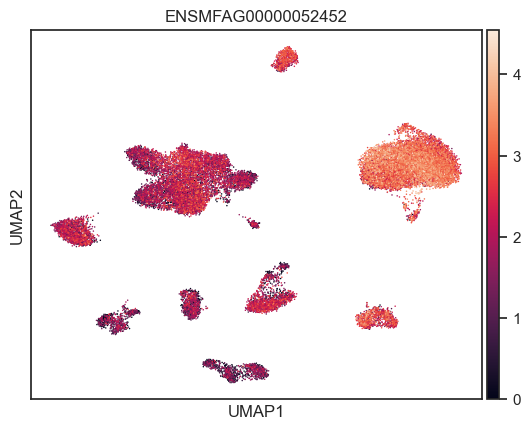

In [189]:
sc.pl.umap(adata, color = 'ENSMFAG00000052452')

In [217]:
sc.pp.highly_variable_genes(adata)

sc.pl.highly_variable_genes(adata)

/Users/emilioskarwan/anaconda3/envs/3-10/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:266: RuntimeWarning: overflow encountered in expm1
  np.expm1(X, out=X)
/Users/emilioskarwan/anaconda3/envs/3-10/lib/python3.10/site-packages/scanpy/_utils/__init__.py:545: RuntimeWarning: overflow encountered in multiply
  return x * y
/Users/emilioskarwan/anaconda3/envs/3-10/lib/python3.10/site-packages/scanpy/preprocessing/_utils.py:40: RuntimeWarning: invalid value encountered in subtract
  var = mean_sq - mean**2


ValueError: cannot specify integer `bins` when input data contains infinity

In [191]:
adata.var[adata.var['highly_variable']].sort_values('norm_variance', ascending = False )[0:20][['gene_symbols', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts']]



,gene_symbols,gene_ids,hsapiens_orthologs_id,hsapiens_orthologs_name,mt,ribo,tf,hb,pl,rRNA,chromosome_loc,pcg,exc,cyt,mem,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts
ENSMFAG00000065517,MYH3,ENSMFAG00000065517,ENSG00000109063,MYH3,False,False,False,False,False,False,16,False,False,False,False,11077,19.434696,3.017234,57.286083,504000.0
ENSMFAG00000045175,DMD,ENSMFAG00000045175,ENSG00000198947,DMD,False,False,True,False,False,False,X,False,False,False,True,12341,14.254502,2.724875,52.411985,369662.0
ENSMFAG00000038552,MYBPC1,ENSMFAG00000038552,ENSG00000196091,MYBPC1,False,False,False,False,False,False,11,False,False,False,False,10827,9.490533,2.350473,58.250106,246118.0
ENSMFAG00000000095,TRDN,ENSMFAG00000000095,ENSG00000186439,TRDN,False,False,False,False,False,False,4,False,False,True,True,11169,8.630702,2.264956,56.931323,223820.0
ENSMFAG00000000203,PDLIM3,ENSMFAG00000000203,ENSG00000154553,PDLIM3,False,False,False,False,False,False,5,False,False,True,False,11735,6.304284,1.988461,54.748776,163489.0
ENSMFAG00000039270,LAMA2,ENSMFAG00000039270,ENSG00000196569,LAMA2,False,False,False,False,False,False,4,False,False,False,True,9864,2.504994,1.254189,61.963521,64962.0
ENSMFAG00000044479,MEF2C,ENSMFAG00000044479,ENSG00000081189,MEF2C,False,False,True,False,False,False,6,False,False,False,False,13619,5.225774,1.828698,47.483901,135520.0
ENSMFAG00000041985,DLC1,ENSMFAG00000041985,ENSG00000164741,DLC1,False,False,False,False,False,False,8,False,False,True,True,9237,2.269695,1.184697,64.381290,58860.0
ENSMFAG00000045512,COL1A2,ENSMFAG00000045512,ENSG00000164692,COL1A2,False,False,False,False,False,False,3,False,False,False,False,9325,1.902711,1.065645,64.041954,49343.0
ENSMFAG00000002296,PBX1,ENSMFAG00000002296,ENSG00000185630,PBX1,False,False,True,False,False,False,1,False,False,False,False,11072,1.824124,1.038198,57.305364,47305.0


In [192]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

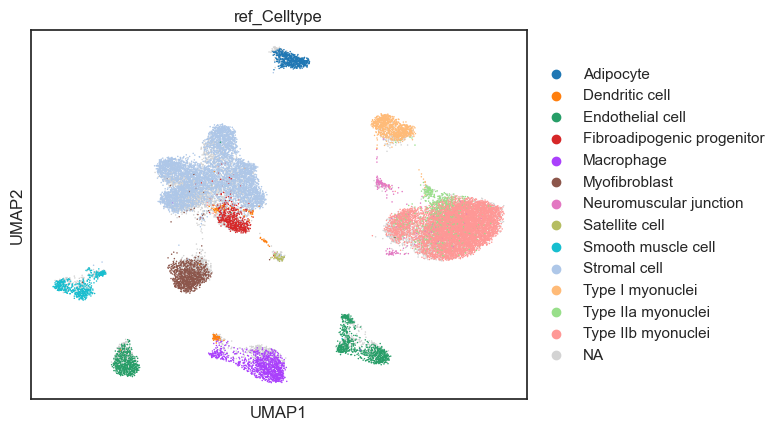

In [193]:
sc.pl.umap(adata, color = 'ref_Celltype')

In [218]:
adata.obs

,pct_unspliced,doublet_score,predicted_doublet,ori_barcode,sample,ref_Celltype,ref_Abbreviation,macaque_id,tissue,n_genes_by_counts,...,pct_counts_pl,total_counts_exc,log1p_total_counts_exc,pct_counts_exc,total_counts_cyt,log1p_total_counts_cyt,pct_counts_cyt,total_counts_mem,log1p_total_counts_mem,pct_counts_mem
Abdominal_wall_217:AACACCTGATAACTTGCACC,75.108840,0.051186,False,AACACCTGATAACTTGCACC,Abdominal_wall_217,Type IIb myonuclei,Type IIb myonuclei,MM2,Abdominal_wall,1495,...,0.000000,8.0,2.197225,0.166251,878.0,6.778785,18.246052,1000.0,6.908755,20.781380
Abdominal_wall_217:AACACCTGATAGACCGTCGT,79.373650,0.074675,False,AACACCTGATAGACCGTCGT,Abdominal_wall_217,Stromal cell,Stromal,MM2,Abdominal_wall,944,...,0.114351,17.0,2.890372,0.971984,311.0,5.743003,17.781590,381.0,5.945421,21.783876
Abdominal_wall_217:AACACCTGATATCAGAGTCA,73.073190,0.038988,False,AACACCTGATATCAGAGTCA,Abdominal_wall_217,Type IIb myonuclei,Type IIb myonuclei,MM2,Abdominal_wall,1594,...,0.000000,10.0,2.397895,0.219925,899.0,6.802395,19.771278,936.0,6.842683,20.585001
Abdominal_wall_217:AACACCTGATGATTGATGGC,77.570591,0.025641,False,AACACCTGATGATTGATGGC,Abdominal_wall_217,Type IIb myonuclei,Type IIb myonuclei,MM2,Abdominal_wall,795,...,0.057241,1.0,0.693147,0.057241,317.0,5.762052,18.145393,334.0,5.814130,19.118490
Abdominal_wall_217:AACACTCTCCCGATCACGAT,75.108069,0.024834,False,AACACTCTCCCGATCACGAT,Abdominal_wall_217,Type IIb myonuclei,Type IIb myonuclei,MM2,Abdominal_wall,1587,...,0.020105,3.0,1.386294,0.060314,915.0,6.820016,18.395658,1085.0,6.990256,21.813431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Abdominal_wall_215:TTGTCTGCAGCTCGATTGGT,77.063011,0.030783,False,TTGTCTGCAGCTCGATTGGT,Abdominal_wall_215,NaN,NaN,MM2,Abdominal_wall,1305,...,0.030093,1.0,0.693147,0.030093,606.0,6.408529,18.236532,783.0,6.664409,23.563046
Abdominal_wall_215:TTGTGGCATCAGCAAGCGAC,76.165347,0.049447,False,TTGTGGCATCAGCAAGCGAC,Abdominal_wall_215,NaN,NaN,MM2,Abdominal_wall,658,...,0.000000,3.0,1.386294,0.283019,224.0,5.416101,21.132076,226.0,5.424950,21.320755
Abdominal_wall_215:TTGTGGCATCCGTTCGATGG,61.794501,0.030783,False,TTGTGGCATCCGTTCGATGG,Abdominal_wall_215,NaN,NaN,MM2,Abdominal_wall,461,...,0.781250,14.0,2.708050,2.187500,128.0,4.859812,20.000000,163.0,5.099866,25.468748
Abdominal_wall_215:TTGTGGCATCCTTCAATAAT,78.858746,0.097816,False,TTGTGGCATCCTTCAATAAT,Abdominal_wall_215,NaN,NaN,MM2,Abdominal_wall,469,...,0.099602,0.0,0.000000,0.000000,186.0,5.231109,18.525896,273.0,5.613128,27.191235


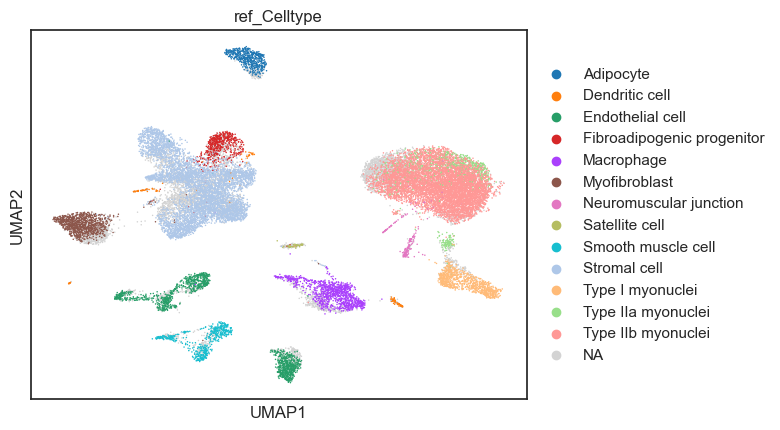

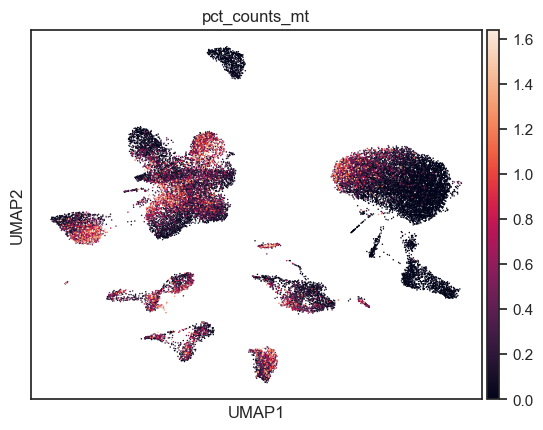

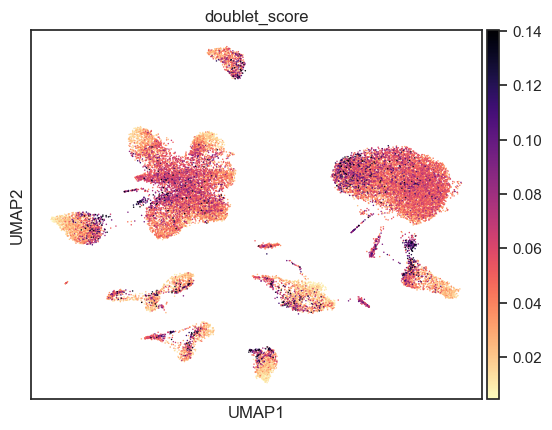

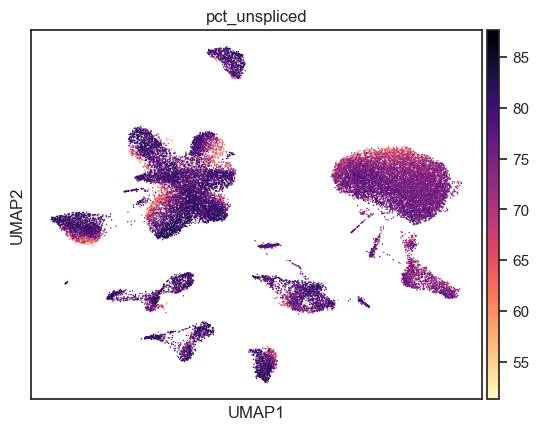

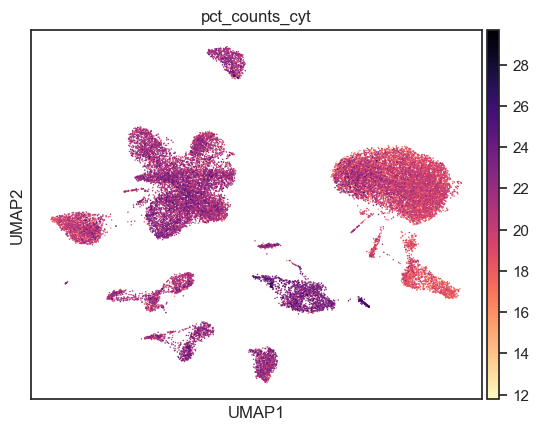

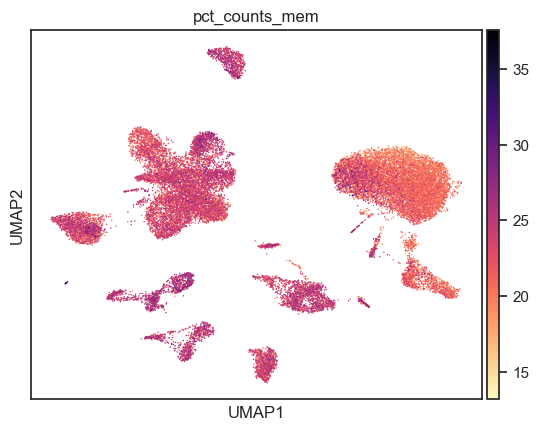

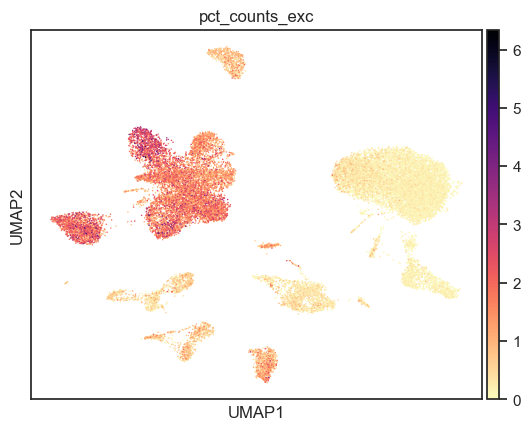

In [233]:
with save_plots_to_pdf(os.path.join(export_plots_directory, 'filtered_umap_mito90_scaled.pdf')):
    sc.pl.umap(adata, color = 'ref_Celltype')
    sc.pl.umap(adata, color = 'pct_counts_mt')
    sc.pl.umap(adata, color = 'doublet_score', color_map = 'magma_r')
    sc.pl.umap(adata, color = 'pct_unspliced', color_map = 'magma_r')
    sc.pl.umap(adata, color = 'pct_counts_cyt', color_map = 'magma_r')
    sc.pl.umap(adata, color = 'pct_counts_mem', color_map = 'magma_r')
    sc.pl.umap(adata, color = 'pct_counts_exc', color_map = 'magma_r')

In [195]:
adata

AnnData object with n_obs × n_vars = 25933 × 24148
    obs: 'pct_unspliced', 'doublet_score', 'predicted_doublet', 'ori_barcode', 'sample', 'ref_Celltype', 'ref_Abbreviation', 'macaque_id', 'tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl', 'log1p_total_counts_pl', 'pct_counts_pl'
    var: 'gene_symbols', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'norm_variance', 'norm_mean', 'norm_median', 'norm_std', 'log1p_norm_variance', 'log1p_norm_mean', 'log1p_norm_median', 'log1p_no